In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data
bikeSharing = pd.read_csv('data/day.csv')
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check column and row size of data
bikeSharing.shape

(730, 16)

In [4]:
#check meta data
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#check statiscs of data
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#drop unusable columns
bikeSharing = bikeSharing.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
#map non binary categorical columns to their original values
season = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
bikeSharing["season"] = bikeSharing["season"].map(season)

year = {0: 2018, 1:2019}
bikeSharing["year"] = bikeSharing["yr"].map(year)

month = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 
         10: "October", 11: "November", 12: "December"}
bikeSharing["month"] = bikeSharing["mnth"].map(month)

weekday = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
bikeSharing["weekday"] = bikeSharing["weekday"].map(weekday)

weather = {1: "Clear, Few clouds, Partly cloudy, Partly cloudy", 
           2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
           3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
           4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}
bikeSharing["weathersit"] = bikeSharing["weathersit"].map(weather)

bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,0,1,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985,2018,January
1,spring,0,1,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801,2018,January
2,spring,0,1,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349,2018,January
3,spring,0,1,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562,2018,January
4,spring,0,1,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600,2018,January


In [8]:
#drop feature_valued columns yr and mnth
bikeSharing = bikeSharing.drop(['yr', 'mnth'], axis = 1)
bikeSharing.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985,2018,January
1,spring,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801,2018,January
2,spring,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349,2018,January
3,spring,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562,2018,January
4,spring,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600,2018,January


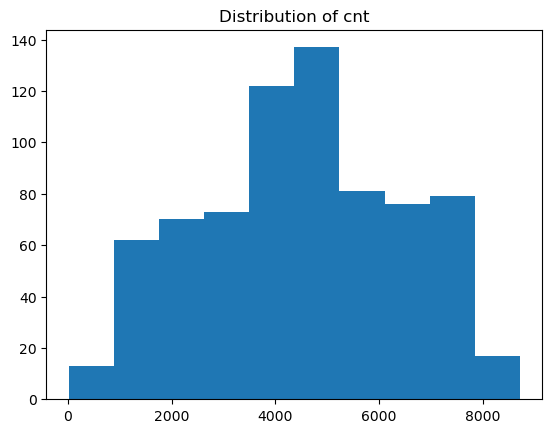

In [9]:
#univariate analysis
plt.hist(bikeSharing["cnt"])
#plt.boxplot(bikeSharing["cnt"])
#plt.violinplot(bikeSharing["cnt"])
plt.title("Distribution of cnt")
plt.show()

In [10]:
#check statistics of continuous data
print(bikeSharing["cnt"].describe())

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


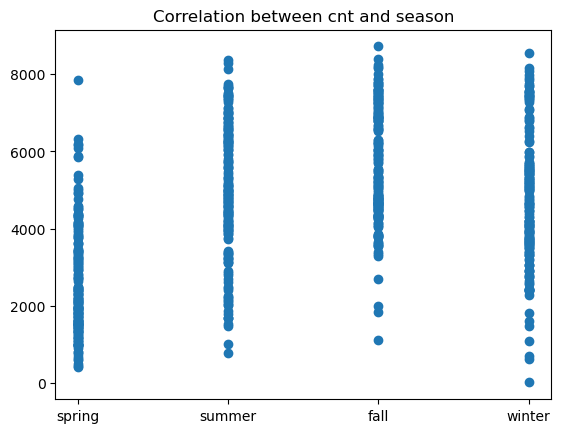

In [11]:
#Bivariate Analysis of categorical columns using scatter plot
#season column vs cnt
plt.scatter(bikeSharing["season"], bikeSharing["cnt"])
plt.title("Correlation between cnt and season")
plt.show()

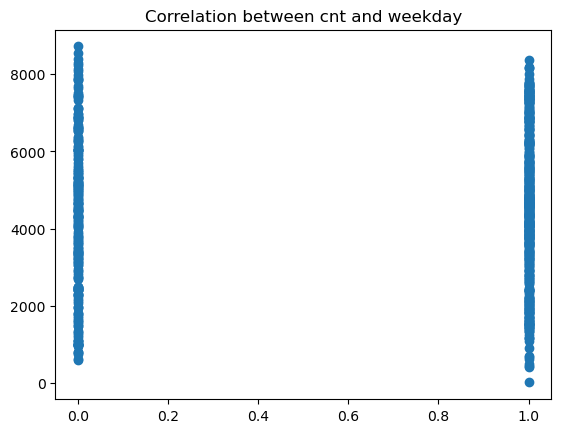

In [12]:
#weekday vs cnt
plt.scatter(bikeSharing["workingday"], bikeSharing["cnt"])
plt.title("Correlation between cnt and weekday")
plt.show()

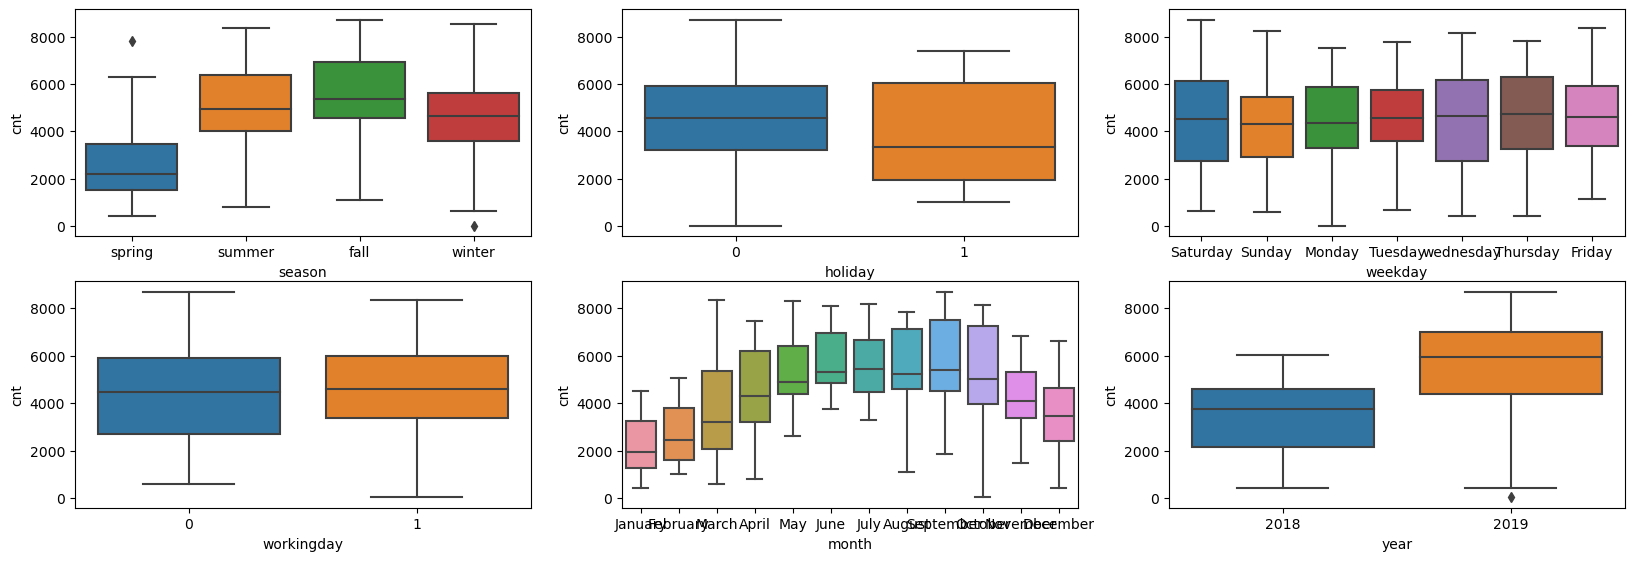

In [13]:
#visualising categorical variables using boxplot
plt.figure(figsize = (20, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)

plt.subplot(3, 3, 4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing)

#plt.subplot(3, 3, 5)
#sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)

plt.subplot(3, 3, 6)
sns.boxplot(x = 'year', y = 'cnt', data = bikeSharing)

#plt.subplot(3, 3, 7)
plt.subplot(3, 3, 5)
sns.boxplot(x = 'month', y = 'cnt', data = bikeSharing)

plt.show()

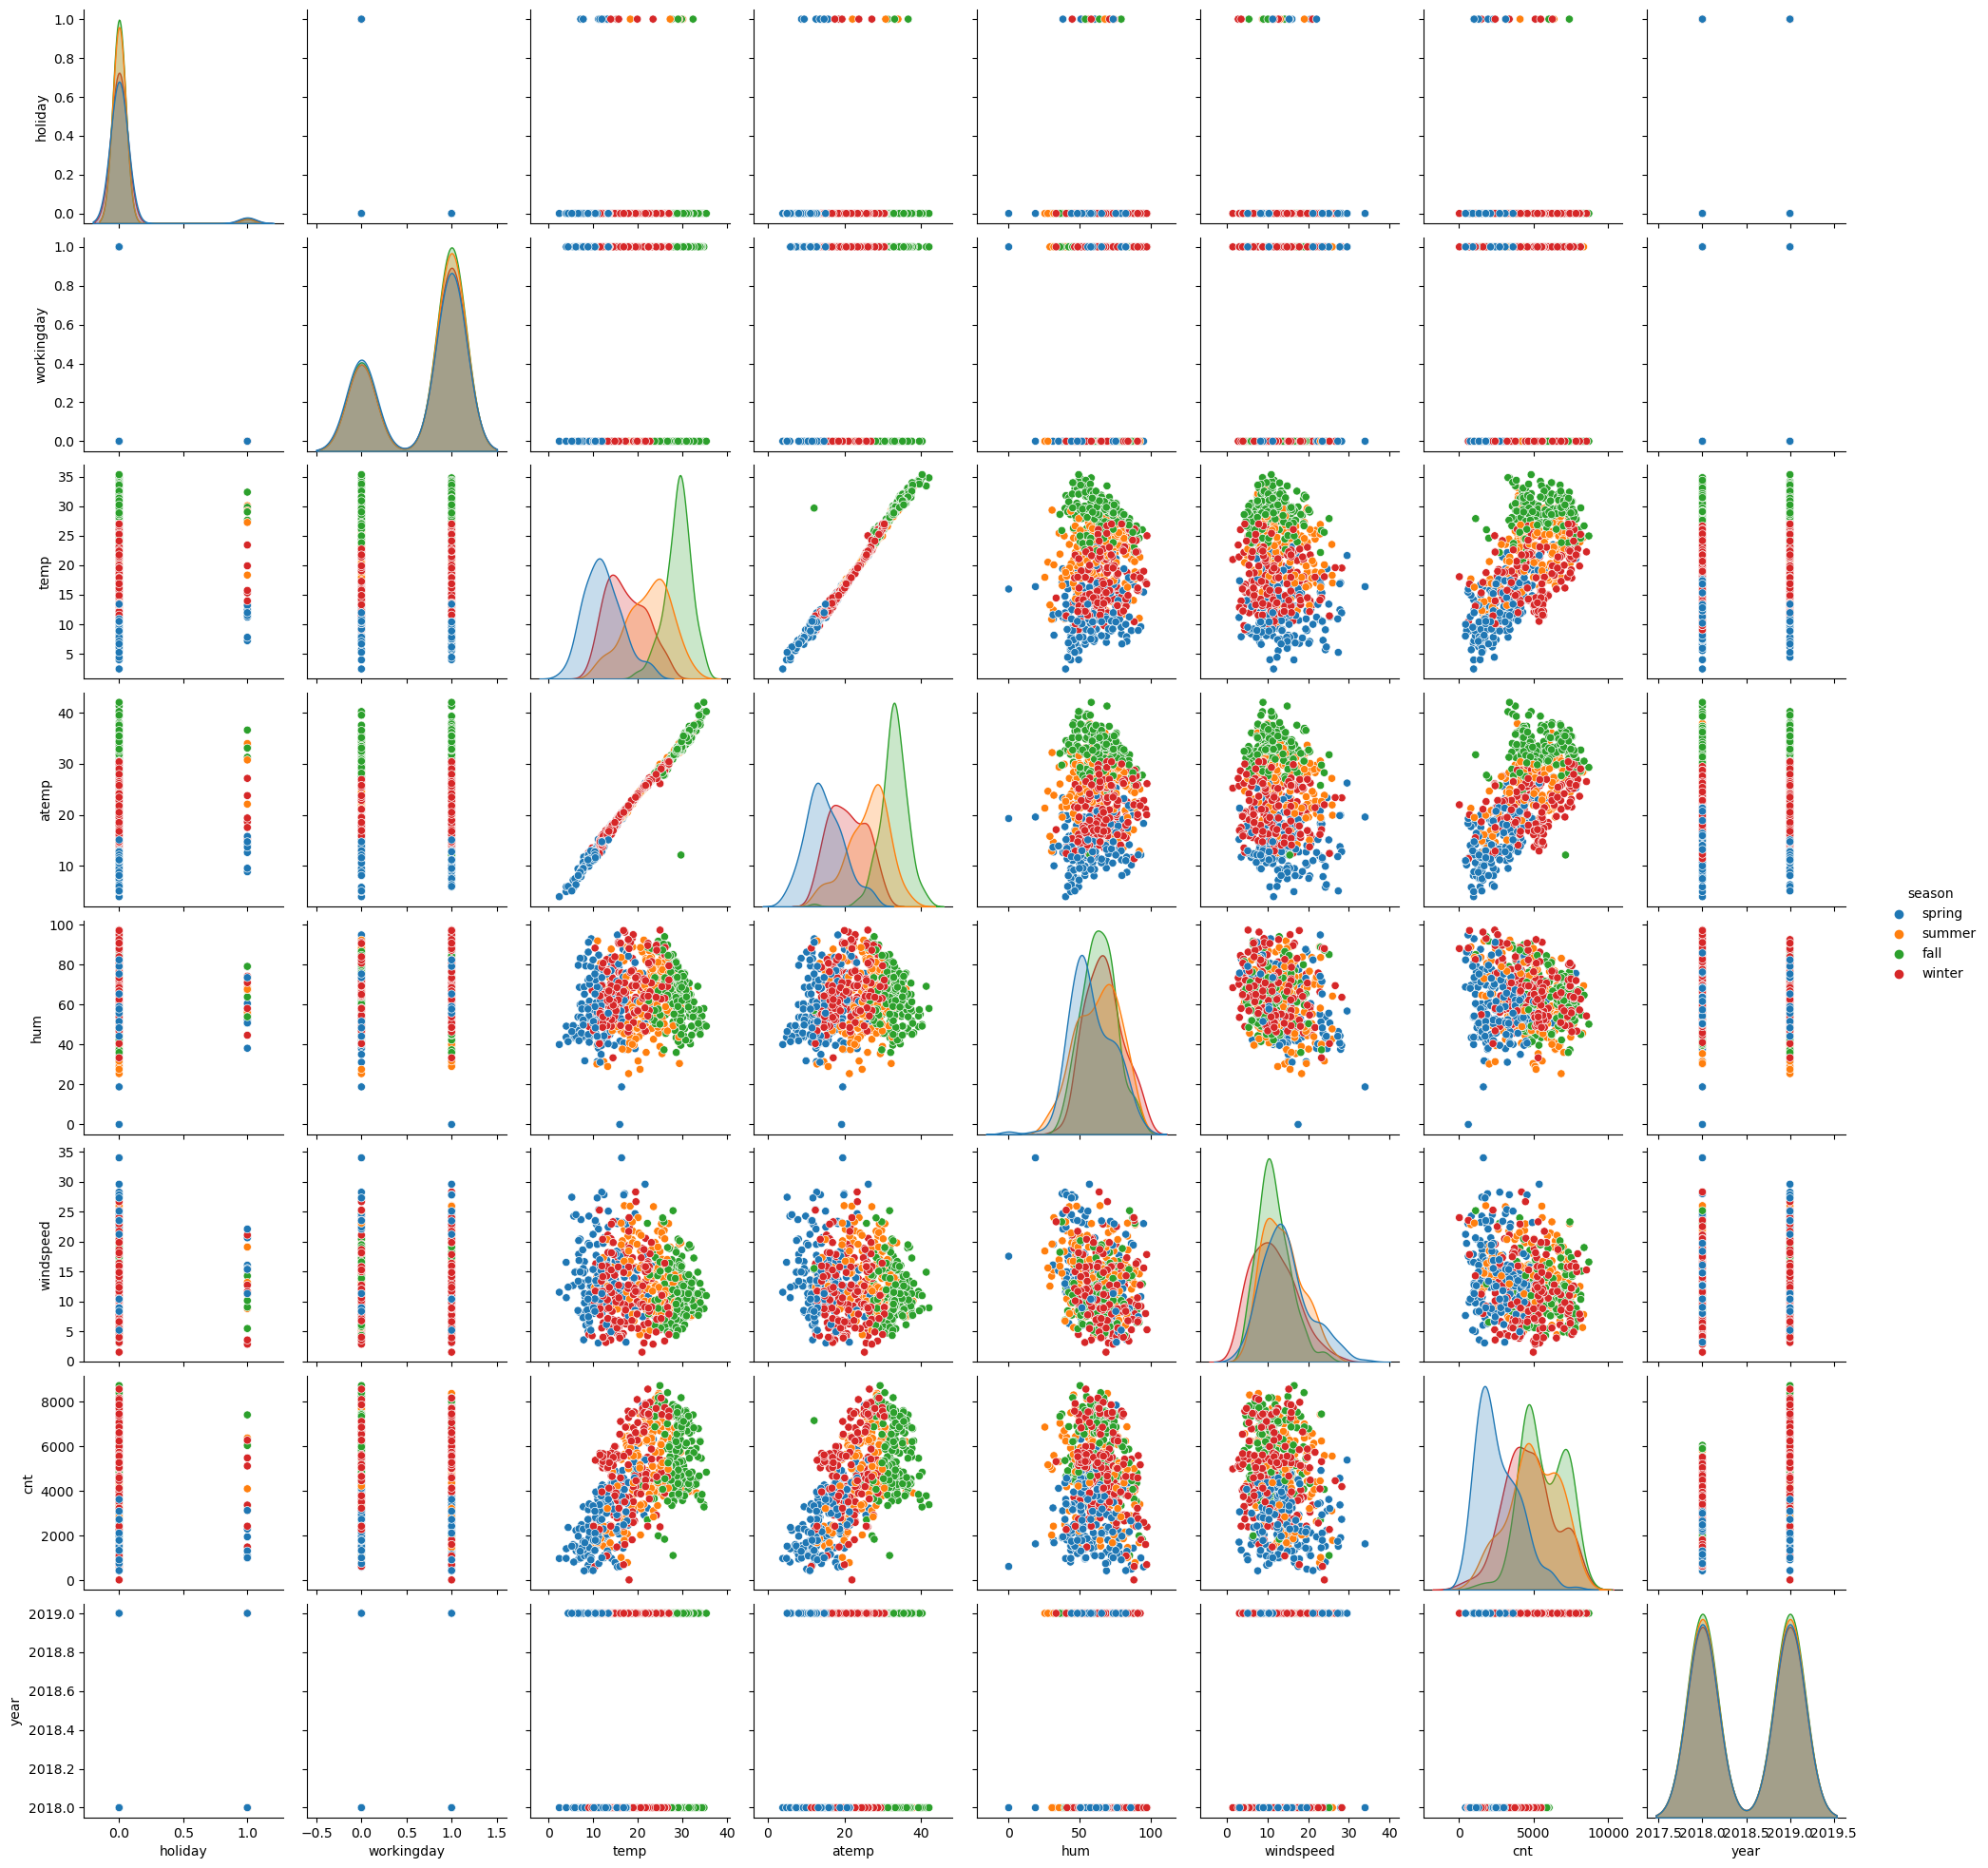

In [14]:
#multivariate analysis
sns.pairplot(bikeSharing, hue = "season")
plt.show()

# preparing data for modeling


In [15]:
bikeSharing.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985,2018,January
1,spring,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801,2018,January
2,spring,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349,2018,January
3,spring,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562,2018,January
4,spring,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600,2018,January


In [16]:
#creating dummy variables for categorical columns
seasons = pd.get_dummies(bikeSharing['season'], drop_first = True)
weekdays = pd.get_dummies(bikeSharing['weekday'], drop_first = True)
weather = pd.get_dummies(bikeSharing['weathersit'], drop_first = True)
years = pd.get_dummies(bikeSharing['year'], drop_first = True)
months = pd.get_dummies(bikeSharing['month'], drop_first = True)

In [17]:
#concat the dummy dataframe of seasons with the original one
bikeSharing = pd.concat([bikeSharing, seasons], axis = 1)
bikeSharing = bikeSharing.drop('season', axis = 1)
bikeSharing.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,spring,summer,winter
0,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985,2018,January,1,0,0
1,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801,2018,January,1,0,0
2,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349,2018,January,1,0,0
3,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562,2018,January,1,0,0
4,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600,2018,January,1,0,0


In [18]:
#concat the dummy dataframe of weekdays with the original one
bikeSharing = pd.concat([bikeSharing, weekdays], axis = 1)
bikeSharing = bikeSharing.drop('weekday', axis = 1)
bikeSharing.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,wednesday
0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985,2018,January,1,0,0,0,1,0,0,0,0
1,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801,2018,January,1,0,0,0,0,1,0,0,0
2,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349,2018,January,1,0,0,1,0,0,0,0,0
3,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562,2018,January,1,0,0,0,0,0,0,1,0
4,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600,2018,January,1,0,0,0,0,0,0,0,1


In [19]:
#concat the dummy dataframe of weather with the original one
bikeSharing = pd.concat([bikeSharing, weather], axis = 1)
bikeSharing = bikeSharing.drop('weathersit', axis = 1)
bikeSharing.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,year,month,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,wednesday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,14.110847,18.18125,80.5833,10.749882,985,2018,January,1,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,2018,January,1,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,2018,January,1,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,2018,January,1,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,2018,January,1,0,0,0,0,0,0,0,1,0,0


In [20]:
#concat the dummy dataframe of years with the original one
bikeSharing = pd.concat([bikeSharing, years], axis = 1)
bikeSharing = bikeSharing.drop('year', axis = 1)
bikeSharing.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,month,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,wednesday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",2019
0,0,0,14.110847,18.18125,80.5833,10.749882,985,January,1,0,0,0,1,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,January,1,0,0,0,0,1,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,January,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,January,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,January,1,0,0,0,0,0,0,0,1,0,0,0


In [21]:
#concat the dummy dataframe of months with the original one
bikeSharing = pd.concat([bikeSharing, months], axis = 1)
bikeSharing = bikeSharing.drop('month', axis = 1)
bikeSharing.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# split dataset in train-test

In [22]:
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


# Scaling features to keep it between 0 to 1

In [23]:
#instantiate an object of class MinMaxScalar
mnmxscaler = MinMaxScaler()

#create a list of numeric variables
num_list = ["temp", "atemp", "hum", "windspeed","cnt"]

#fit data

df_train[num_list] = mnmxscaler.fit_transform(df_train[num_list])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Training the Model

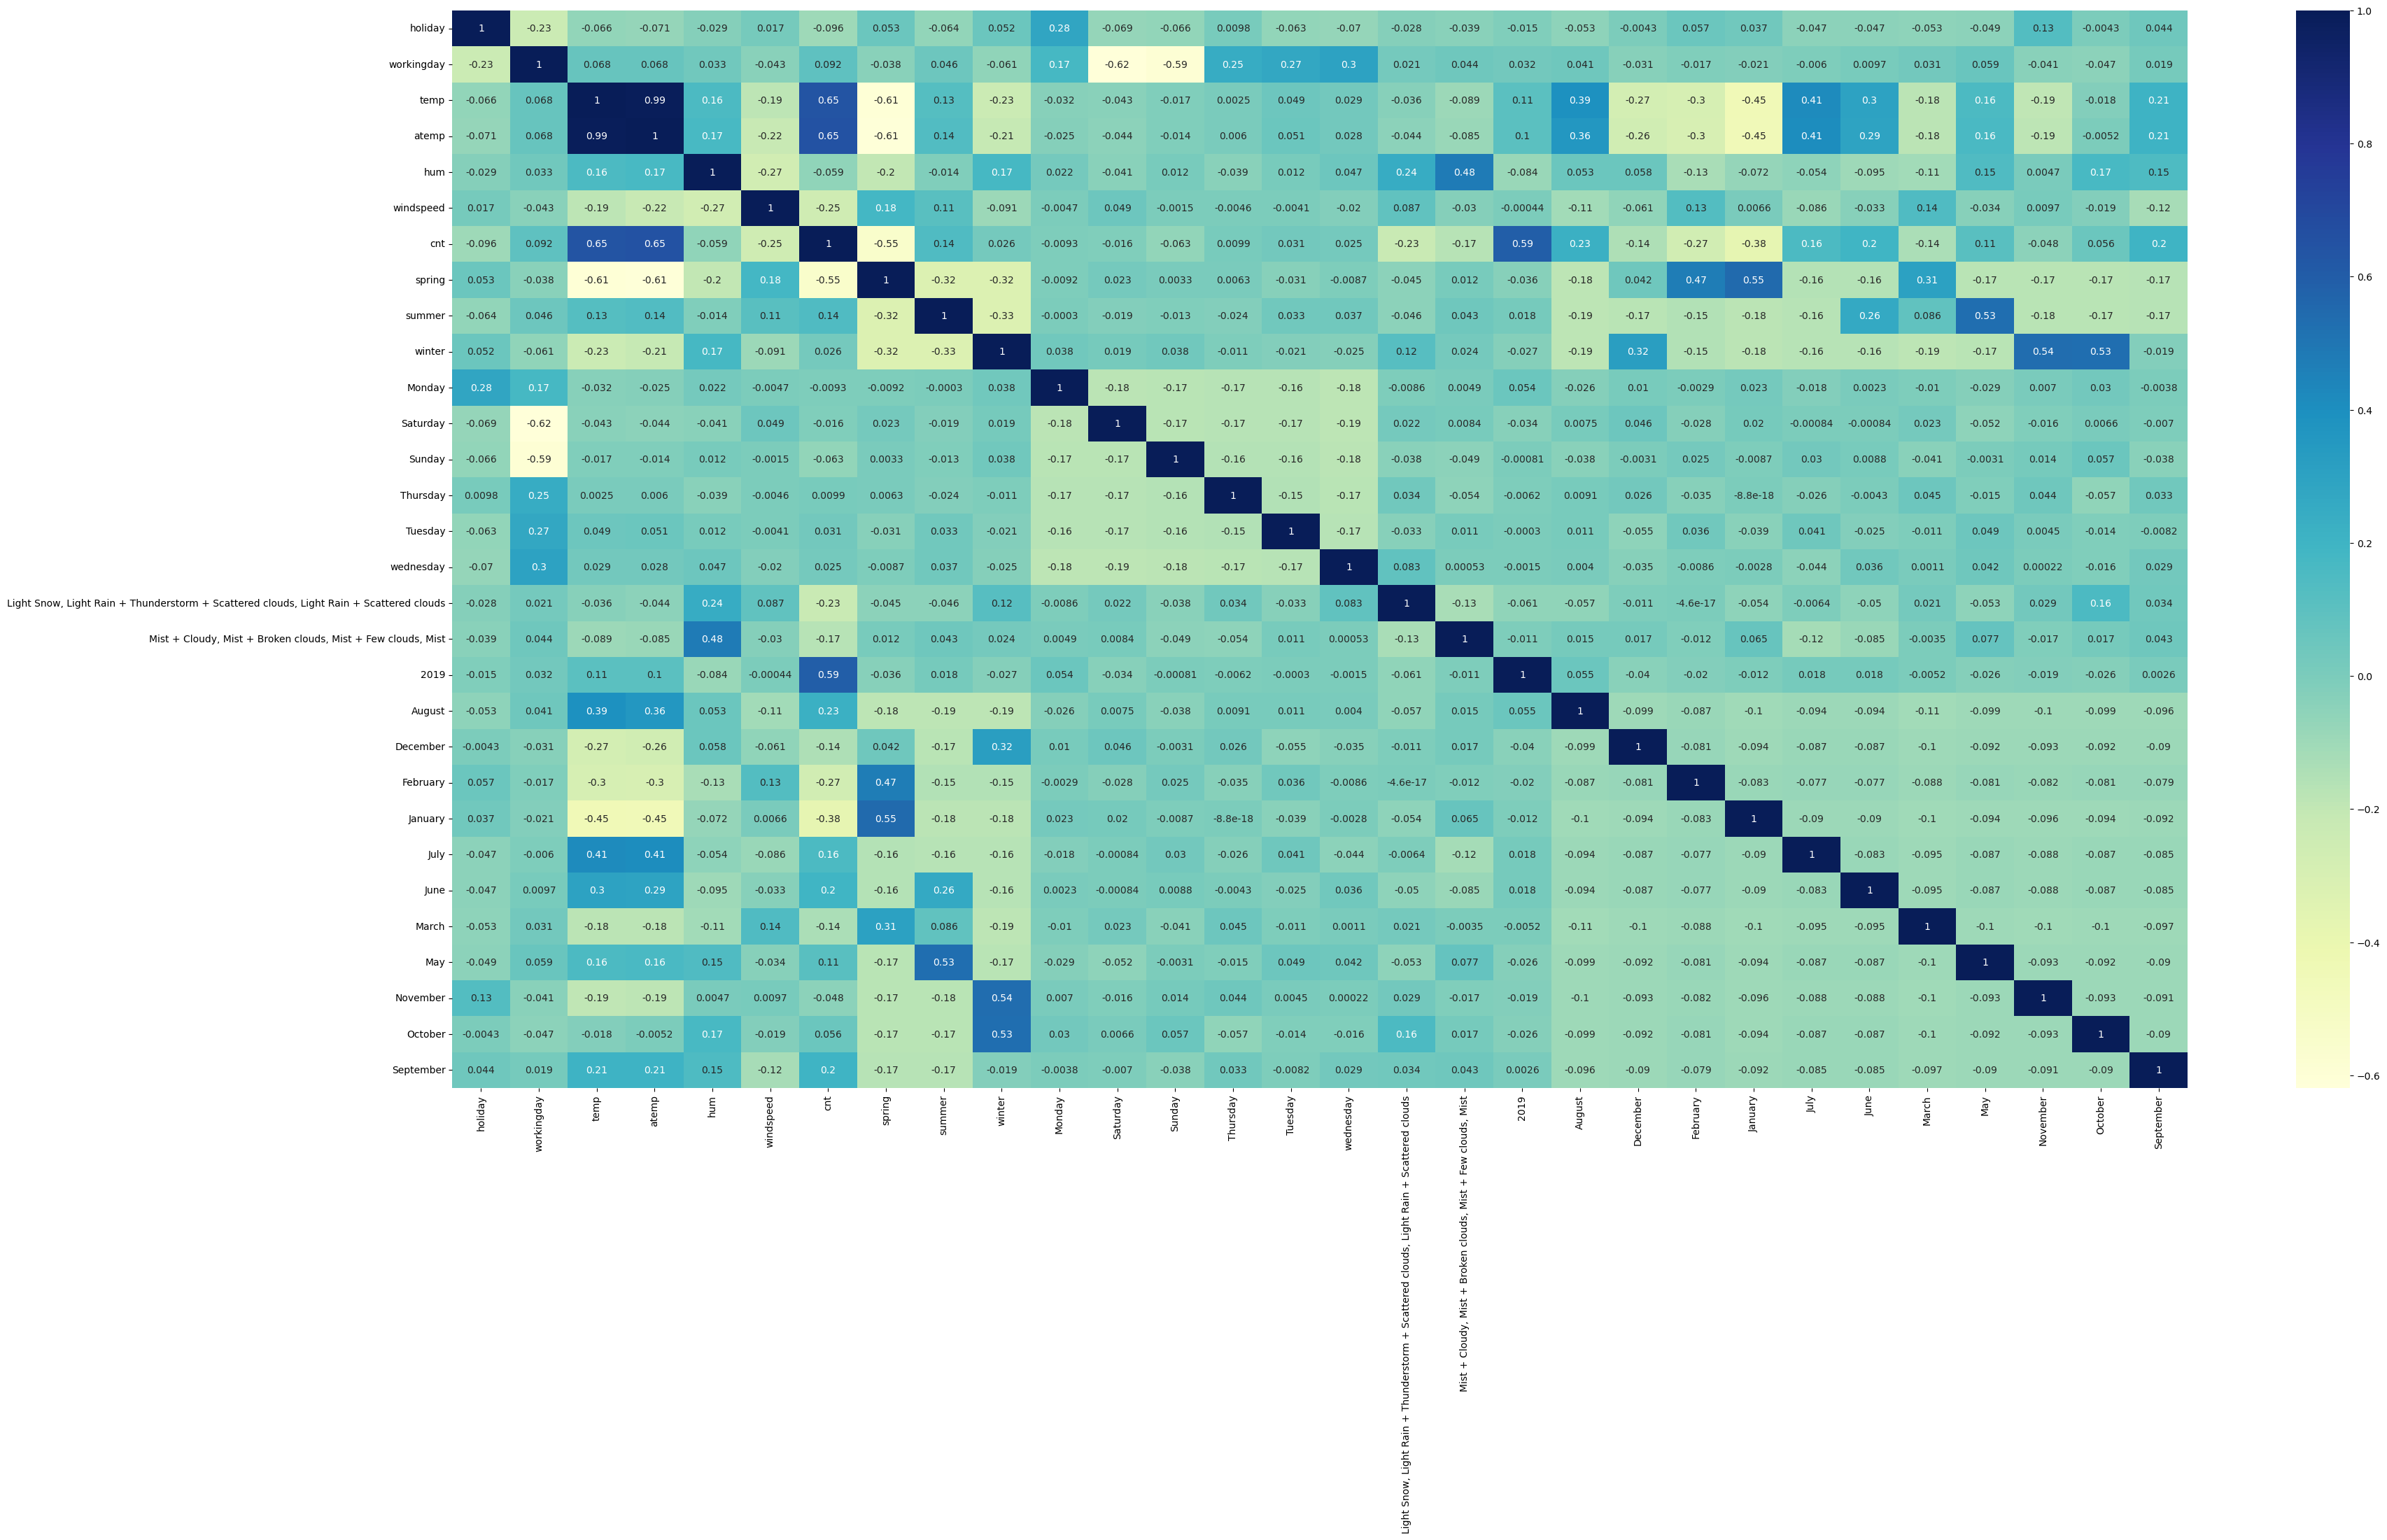

In [24]:
#heatmap of avilable data
plt.figure(figsize = (40, 20))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [25]:
#split X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

y_train.head()
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Monday,...,December,February,January,July,June,March,May,November,October,September
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building the model adding one variable at a time (Model - 1)

In [26]:
#add constant to X_train

X_train_sm = sm.add_constant(X_train['holiday'])

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.params

const      0.516979
holiday   -0.136487
dtype: float64

In [27]:
#check model summary 
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.720
Date:                Wed, 19 Jul 2023   Prob (F-statistic):             0.0303
Time:                        21:15:57   Log-Likelihood:                 41.259
No. Observations:                 510   AIC:                            -78.52
Df Residuals:                     508   BIC:                            -70.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5170      0.010     51.543      0.000       0.497       0.537
holiday       -0.1365      0.063     -2.173      0.030      -0.260      -0.013
==============================================================================
Omnibus:                       47.262   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.127
Skew:                          -0.054   Prob(JB):                     0.000519
Kurtosis:                       2.163   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#add another variable
X_train_sm = X_train[['holiday', 'temp']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     182.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.71e-60
Time:                        21:16:03   Log-Likelihood:                 177.33
No. Observations:                 510   AIC:                            -348.7
Df Residuals:                     507   BIC:                            -336.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1729      0.020      8.749      0.000       0.134       0.212
holiday       -0.0759      0.048     -1.572      0.116      -0.171       0.019
temp           0.6374      0.034     18.907      0.000       0.571       0.704
==============================================================================
Omnibus:                        6.251   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.431
Skew:                           0.083   Prob(JB):                        0.109
Kurtosis:                       2.575   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#add another variable
X_train_sm = X_train[['holiday', 'temp', 'workingday']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     122.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.46e-59
Time:                        21:16:05   Log-Likelihood:                 177.93
No. Observations:                 510   AIC:                            -347.9
Df Residuals:                     506   BIC:                            -330.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1613      0.022      7.195      0.000       0.117       0.205
holiday       -0.0635      0.050     -1.280      0.201      -0.161       0.034
temp           0.6354      0.034     18.823      0.000       0.569       0.702
workingday     0.0182      0.017      1.087      0.278      -0.015       0.051
==============================================================================
Omnibus:                        5.440   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.056
Skew:                           0.089   Prob(JB):                        0.132
Kurtosis:                       2.601   Cond. No.                         8.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#add another variable
X_train_sm = X_train[['holiday', 'temp', 'workingday', 'Monday']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     91.66
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.51e-58
Time:                        21:16:14   Log-Likelihood:                 178.08
No. Observations:                 510   AIC:                            -346.2
Df Residuals:                     505   BIC:                            -325.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1610      0.022      7.176      0.000       0.117       0.205
holiday       -0.0731      0.053     -1.389      0.165      -0.176       0.030
temp           0.6360      0.034     18.818      0.000       0.570       0.702
workingday     0.0157      0.017      0.907      0.365      -0.018       0.050
Monday         0.0126      0.023      0.550      0.583      -0.032       0.057
==============================================================================
Omnibus:                        5.185   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.961
Skew:                           0.095   Prob(JB):                        0.138
Kurtosis:                       2.612   Cond. No.                         9.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#add another variable
X_train_sm = X_train[['holiday', 'temp', 'workingday', 'November']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     94.35
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           6.87e-60
Time:                        21:16:16   Log-Likelihood:                 181.21
No. Observations:                 510   AIC:                            -352.4
Df Residuals:                     505   BIC:                            -331.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1467      0.023      6.373      0.000       0.101       0.192
holiday       -0.0779      0.050     -1.570      0.117      -0.175       0.020
temp           0.6519      0.034     19.070      0.000       0.585       0.719
workingday     0.0182      0.017      1.097      0.273      -0.014       0.051
November       0.0707      0.028      2.560      0.011       0.016       0.125
==============================================================================
Omnibus:                        4.188   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.357
Skew:                           0.088   Prob(JB):                        0.187
Kurtosis:                       2.644   Cond. No.                         9.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#add another variable
X_train_sm = X_train[['holiday', 'temp', 'workingday', 'Monday', 'winter']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     84.13
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           3.61e-64
Time:                        21:16:17   Log-Likelihood:                 193.64
No. Observations:                 510   AIC:                            -375.3
Df Residuals:                     504   BIC:                            -349.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1110      0.024      4.717      0.000       0.065       0.157
holiday       -0.0774      0.051     -1.514      0.131      -0.178       0.023
temp           0.6794      0.034     20.157      0.000       0.613       0.746
workingday     0.0200      0.017      1.190      0.234      -0.013       0.053
Monday         0.0085      0.022      0.382      0.703      -0.035       0.052
winter         0.0992      0.018      5.632      0.000       0.065       0.134
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.757
Skew:                          -0.020   Prob(JB):                        0.685
Kurtosis:                       2.815   Cond. No.                         9.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#add another variable
X_train_sm = X_train[['holiday', 'temp', 'workingday', 'Saturday', 'winter', 'spring']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     73.83
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           7.20e-66
Time:                        21:16:18   Log-Likelihood:                 199.97
No. Observations:                 510   AIC:                            -385.9
Df Residuals:                     503   BIC:                            -356.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1894      0.040      4.683      0.000       0.110       0.269
holiday       -0.0452      0.050     -0.909      0.364      -0.143       0.052
temp           0.5590      0.050     11.271      0.000       0.462       0.656
workingday     0.0396      0.021      1.866      0.063      -0.002       0.081
Saturday       0.0364      0.027      1.362      0.174      -0.016       0.089
winter         0.0563      0.022      2.575      0.010       0.013       0.099
spring        -0.0884      0.027     -3.294      0.001      -0.141      -0.036
==============================================================================
Omnibus:                        1.529   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.515
Skew:                          -0.066   Prob(JB):                        0.469
Kurtosis:                       2.768   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#add another variable
X_train_sm = X_train[['temp', 'workingday', 'Saturday', 'Sunday', 'winter', 'spring']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     73.83
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           7.20e-66
Time:                        21:16:19   Log-Likelihood:                 199.97
No. Observations:                 510   AIC:                            -385.9
Df Residuals:                     503   BIC:                            -356.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1442      0.058      2.472      0.014       0.030       0.259
temp           0.5590      0.050     11.271      0.000       0.462       0.656
workingday     0.0848      0.047      1.814      0.070      -0.007       0.177
Saturday       0.0816      0.049      1.652      0.099      -0.015       0.179
Sunday         0.0452      0.050      0.909      0.364      -0.052       0.143
winter         0.0563      0.022      2.575      0.010       0.013       0.099
spring        -0.0884      0.027     -3.294      0.001      -0.141      -0.036
==============================================================================
Omnibus:                        1.529   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.515
Skew:                          -0.066   Prob(JB):                        0.469
Kurtosis:                       2.768   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#add another variable
X_train_sm = X_train[['holiday', 'temp', 'workingday', 'Saturday', 'winter', 'spring', 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     67.34
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           3.31e-68
Time:                        21:16:21   Log-Likelihood:                 207.76
No. Observations:                 510   AIC:                            -399.5
Df Residuals:                     502   BIC:                            -365.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.2199      0.041      5.415      0.000       0.140       0.300
holiday                                                         -0.0491      0.049     -1.003      0.316      -0.145       0.047
temp                                                             0.5384      0.049     10.950      0.000       0.442       0.635
workingday                                                       0.0441      0.021      2.103      0.036       0.003       0.085
Saturday                                                         0.0402      0.026      1.526      0.128      -0.012       0.092
winter                                                           0.0536      0.022      2.485      0.013       0.011       0.096
spring                                                          -0.0949      0.027     -3.579      0.000      -0.147      -0.043
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    -0.0601      0.015     -3.945      0.000      -0.090      -0.030
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.353
Skew:                          -0.117   Prob(JB):                        0.508
Kurtosis:                       2.903   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#add another variable
X_train_sm = X_train[['holiday', 'temp', 'workingday', 'Saturday', 'winter', 'spring', 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     75.86
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.04e-81
Time:                        21:16:23   Log-Likelihood:                 241.27
No. Observations:                 510   AIC:                            -464.5
Df Residuals:                     501   BIC:                            -426.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2346      0.038      6.158      0.000       0.160       0.310
holiday                                                                                    -0.0564      0.046     -1.227      0.220      -0.147       0.034
temp                                                                                        0.5242      0.046     11.365      0.000       0.434       0.615
workingday                                                                                  0.0524      0.020      2.665      0.008       0.014       0.091
Saturday                                                                                    0.0498      0.025      2.013      0.045       0.001       0.098
winter                                                                                      0.0664      0.020      3.273      0.001       0.027       0.106
spring                                                                                     -0.1007      0.025     -4.052      0.000      -0.150      -0.052
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0768      0.014     -5.321      0.000      -0.105      -0.048
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3406      0.041     -8.389      0.000      -0.420      -0.261
==============================================================================
Omnibus:                        9.408   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                6.087
Skew:                           0.106   Prob(JB):                       0.0477
Kurtosis:                       2.509   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#add another variable
X_train_sm = X_train[['temp', 'workingday', 'Saturday', 'winter', 'spring', 2019, 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']]
X_train_sm = sm.add_constant(X_train_sm)

mlr = sm.OLS(y_train, X_train_sm)

mlr_model = mlr.fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     273.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.87e-177
Time:                        21:16:28   Log-Likelihood:                 467.59
No. Observations:                 510   AIC:                            -917.2
Df Residuals:                     501   BIC:                            -879.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.1579      0.024      6.523      0.000       0.110       0.205
temp                                                                                        0.4446      0.030     14.948      0.000       0.386       0.503
workingday                                                                                  0.0566      0.012      4.776      0.000       0.033       0.080
Saturday                                                                                    0.0640      0.015      4.197      0.000       0.034       0.094
winter                                                                                      0.0547      0.013      4.204      0.000       0.029       0.080
spring                                                                                     -0.1206      0.016     -7.555      0.000      -0.152      -0.089
2019                                                                                        0.2340      0.009     26.826      0.000       0.217       0.251
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0746      0.009     -8.060      0.000      -0.093      -0.056
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2998      0.026    -11.492      0.000      -0.351      -0.249
==============================================================================
Omnibus:                       75.691   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.947
Skew:                          -0.723   Prob(JB):                     2.57e-46
Kurtosis:                       5.791   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# adding all variables to the model

In [38]:
#check columns present currently
bikeSharing.columns

Index([                                                                                'holiday',
                                                                                    'workingday',
                                                                                          'temp',
                                                                                         'atemp',
                                                                                           'hum',
                                                                                     'windspeed',
                                                                                           'cnt',
                                                                                        'spring',
                                                                                        'summer',
                                                                                        'winter',
                    

In [39]:
#add all variables and constant
X_train_sm = sm.add_constant(X_train)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.81e-180
Time:                        21:16:37   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2433      0.035      6.887      0.000       0.174       0.313
holiday                                                                                     0.0109      0.024      0.451      0.652      -0.037       0.058
workingday                                                                                  0.0963      0.012      7.835      0.000       0.072       0.120
temp                                                                                        0.3880      0.142      2.727      0.007       0.108       0.668
atemp                                                                                       0.0590      0.138      0.426      0.670      -0.213       0.331
hum                                                                                        -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                                                                                  -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring                                                                                     -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer                                                                                      0.0424      0.026      1.617      0.107      -0.009       0.094
winter                                                                                      0.1071      0.028      3.826      0.000       0.052       0.162
Monday                                                                                     -0.0216      0.015     -1.401      0.162      -0.052       0.009
Saturday                                                                                    0.0952      0.014      6.910      0.000       0.068       0.122
Sunday                                                                                      0.0410      0.014      2.929      0.004       0.013       0.068
Thursday                                                                                   -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tuesday                                                                                    -0.0184      0.016     -1.184      0.237      -0.049       0.012
wednesday                                                                                  -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2550      0.026     -9.63

In [40]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,85.56
2,temp,66.90
3,atemp,56.03
10,Saturday,19.71
11,Sunday,18.34
6,spring,10.77
8,winter,9.46
7,summer,8.29
26,November,6.79
18,August,6.47


In [41]:
X = X_train.drop('March', axis = 1)

In [42]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.75e-181
Time:                        21:16:50   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2441      0.033      7.380      0.000       0.179       0.309
holiday                                                                                     0.0111      0.024      0.462      0.645      -0.036       0.058
workingday                                                                                  0.0965      0.012      8.151      0.000       0.073       0.120
temp                                                                                        0.3877      0.142      2.729      0.007       0.109       0.667
atemp                                                                                       0.0588      0.138      0.425      0.671      -0.213       0.330
hum                                                                                        -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed                                                                                  -0.1837      0.026     -6.983      0.000      -0.235      -0.132
spring                                                                                     -0.0447      0.028     -1.575      0.116      -0.101       0.011
summer                                                                                      0.0421      0.026      1.637      0.102      -0.008       0.093
winter                                                                                      0.1074      0.027      3.910      0.000       0.053       0.161
Monday                                                                                     -0.0216      0.015     -1.402      0.162      -0.052       0.009
Saturday                                                                                    0.0954      0.013      7.159      0.000       0.069       0.122
Sunday                                                                                      0.0411      0.014      3.011      0.003       0.014       0.068
Thursday                                                                                   -0.0097      0.016     -0.622      0.535      -0.040       0.021
Tuesday                                                                                    -0.0184      0.016     -1.185      0.237      -0.049       0.012
wednesday                                                                                  -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2550      0.026     -9.64

In [43]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,74.90
2,temp,66.84
3,atemp,55.99
10,Saturday,17.21
11,Sunday,16.19
6,spring,9.66
8,winter,9.13
7,summer,7.99
18,August,5.74
22,July,5.11


In [44]:
X = X.drop('October', axis = 1)

In [45]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.68e-182
Time:                        21:16:54   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2455      0.032      7.586      0.000       0.182       0.309
holiday                                                                                     0.0117      0.024      0.494      0.622      -0.035       0.058
workingday                                                                                  0.0967      0.012      8.209      0.000       0.074       0.120
temp                                                                                        0.3882      0.142      2.736      0.006       0.109       0.667
atemp                                                                                       0.0589      0.138      0.427      0.670      -0.212       0.330
hum                                                                                        -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed                                                                                  -0.1835      0.026     -6.986      0.000      -0.235      -0.132
spring                                                                                     -0.0460      0.028     -1.655      0.099      -0.101       0.009
summer                                                                                      0.0400      0.024      1.684      0.093      -0.007       0.087
winter                                                                                      0.1101      0.024      4.539      0.000       0.062       0.158
Monday                                                                                     -0.0217      0.015     -1.408      0.160      -0.052       0.009
Saturday                                                                                    0.0956      0.013      7.210      0.000       0.070       0.122
Sunday                                                                                      0.0414      0.014      3.051      0.002       0.015       0.068
Thursday                                                                                   -0.0097      0.016     -0.625      0.532      -0.040       0.021
Tuesday                                                                                    -0.0185      0.016     -1.190      0.235      -0.049       0.012
wednesday                                                                                  -0.0059      0.015     -0.396      0.693      -0.035       0.023
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2548      0.026     -9.64

In [46]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,72.29
2,temp,66.83
3,atemp,55.99
10,Saturday,16.60
11,Sunday,15.58
6,spring,9.26
8,winter,7.14
7,summer,6.84
18,August,4.90
22,July,4.42


In [47]:
X = X.drop('June', axis = 1)

In [48]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.55e-183
Time:                        21:17:01   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2457      0.032      7.604      0.000       0.182       0.309
holiday                                                                                     0.0114      0.024      0.483      0.630      -0.035       0.058
workingday                                                                                  0.0968      0.012      8.231      0.000       0.074       0.120
temp                                                                                        0.3961      0.135      2.926      0.004       0.130       0.662
atemp                                                                                       0.0554      0.137      0.405      0.685      -0.213       0.324
hum                                                                                        -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed                                                                                  -0.1841      0.026     -7.081      0.000      -0.235      -0.133
spring                                                                                     -0.0474      0.027     -1.771      0.077      -0.100       0.005
summer                                                                                      0.0393      0.023      1.677      0.094      -0.007       0.085
winter                                                                                      0.1086      0.023      4.756      0.000       0.064       0.153
Monday                                                                                     -0.0216      0.015     -1.403      0.161      -0.052       0.009
Saturday                                                                                    0.0959      0.013      7.264      0.000       0.070       0.122
Sunday                                                                                      0.0416      0.014      3.079      0.002       0.015       0.068
Thursday                                                                                   -0.0097      0.016     -0.624      0.533      -0.040       0.021
Tuesday                                                                                    -0.0185      0.016     -1.190      0.235      -0.049       0.012
wednesday                                                                                  -0.0058      0.015     -0.390      0.697      -0.035       0.023
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2548      0.026     -9.65

In [49]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,72.18
2,temp,60.92
3,atemp,54.96
10,Saturday,16.55
11,Sunday,15.54
6,spring,8.60
7,summer,6.66
8,winter,6.34
0,holiday,3.98
18,August,3.19


In [50]:
X = X.drop('wednesday', axis = 1)

In [51]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.52e-184
Time:                        21:17:05   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2450      0.032      7.601      0.000       0.182       0.308
holiday                                                                                     0.0099      0.023      0.423      0.672      -0.036       0.056
workingday                                                                                  0.0949      0.011      8.853      0.000       0.074       0.116
temp                                                                                        0.3987      0.135      2.952      0.003       0.133       0.664
atemp                                                                                       0.0523      0.136      0.383      0.702      -0.216       0.320
hum                                                                                        -0.1526      0.038     -4.036      0.000      -0.227      -0.078
windspeed                                                                                  -0.1842      0.026     -7.091      0.000      -0.235      -0.133
spring                                                                                     -0.0475      0.027     -1.777      0.076      -0.100       0.005
summer                                                                                      0.0391      0.023      1.672      0.095      -0.007       0.085
winter                                                                                      0.1087      0.023      4.762      0.000       0.064       0.153
Monday                                                                                     -0.0183      0.013     -1.415      0.158      -0.044       0.007
Saturday                                                                                    0.0972      0.013      7.639      0.000       0.072       0.122
Sunday                                                                                      0.0430      0.013      3.295      0.001       0.017       0.069
Thursday                                                                                   -0.0064      0.013     -0.492      0.623      -0.032       0.019
Tuesday                                                                                    -0.0152      0.013     -1.162      0.246      -0.041       0.011
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2556      0.026     -9.719      0.000      -0.307      -0.204
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0592      0.010     -5.71

In [52]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,70.22
2,temp,60.77
3,atemp,54.77
10,Saturday,16.52
11,Sunday,15.51
6,spring,8.60
7,summer,6.66
8,winter,6.34
0,holiday,3.92
17,August,3.19


In [53]:
X = X.drop('atemp', axis = 1)

In [54]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.42e-185
Time:                        21:17:08   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2447      0.032      7.601      0.000       0.181       0.308
holiday                                                                                     0.0092      0.023      0.398      0.691      -0.036       0.055
workingday                                                                                  0.0949      0.011      8.858      0.000       0.074       0.116
temp                                                                                        0.4483      0.038     11.674      0.000       0.373       0.524
hum                                                                                        -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed                                                                                  -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring                                                                                     -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer                                                                                      0.0399      0.023      1.716      0.087      -0.006       0.086
winter                                                                                      0.1095      0.023      4.830      0.000       0.065       0.154
Monday                                                                                     -0.0179      0.013     -1.389      0.165      -0.043       0.007
Saturday                                                                                    0.0974      0.013      7.663      0.000       0.072       0.122
Sunday                                                                                      0.0432      0.013      3.313      0.001       0.018       0.069
Thursday                                                                                   -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tuesday                                                                                    -0.0150      0.013     -1.145      0.253      -0.041       0.011
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2563      0.026     -9.782      0.000      -0.308      -0.205
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0593      0.010     -5.730      0.000      -0.080      -0.039
2019                                                                                        0.2322      0.008     29.05

In [55]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,70.18
9,Saturday,16.52
10,Sunday,15.51
5,spring,8.55
6,summer,6.60
7,winter,6.27
2,temp,4.92
0,holiday,3.91
16,August,3.17
20,July,2.81


In [56]:
X = X.drop('holiday', axis = 1)

In [57]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.42e-185
Time:                        21:17:12   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2539      0.048      5.250      0.000       0.159       0.349
workingday                                                                                  0.0856      0.026      3.248      0.001       0.034       0.137
temp                                                                                        0.4483      0.038     11.674      0.000       0.373       0.524
hum                                                                                        -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed                                                                                  -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring                                                                                     -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer                                                                                      0.0399      0.023      1.716      0.087      -0.006       0.086
winter                                                                                      0.1095      0.023      4.830      0.000       0.065       0.154
Monday                                                                                     -0.0179      0.013     -1.389      0.165      -0.043       0.007
Saturday                                                                                    0.0881      0.029      3.043      0.002       0.031       0.145
Sunday                                                                                      0.0339      0.029      1.168      0.244      -0.023       0.091
Thursday                                                                                   -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tuesday                                                                                    -0.0150      0.013     -1.145      0.253      -0.041       0.011
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2563      0.026     -9.782      0.000      -0.308      -0.205
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0593      0.010     -5.730      0.000      -0.080      -0.039
2019                                                                                        0.2322      0.008     29.055      0.000       0.217       0.248
August                                                                                      0.0151      0.024      0.63

In [58]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,hum,36.38
1,temp,24.25
0,workingday,20.83
4,spring,8.39
5,summer,6.70
6,winter,6.69
8,Saturday,5.91
9,Sunday,5.58
3,windspeed,5.13
15,August,3.26


In [59]:
X = X.drop('Thursday', axis = 1)

In [60]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.36e-186
Time:                        21:17:15   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2512      0.048      5.235      0.000       0.157       0.345
workingday                                                                                  0.0861      0.026      3.269      0.001       0.034       0.138
temp                                                                                        0.4484      0.038     11.686      0.000       0.373       0.524
hum                                                                                        -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed                                                                                  -0.1863      0.025     -7.327      0.000      -0.236      -0.136
spring                                                                                     -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer                                                                                      0.0401      0.023      1.726      0.085      -0.006       0.086
winter                                                                                      0.1099      0.023      4.851      0.000       0.065       0.154
Monday                                                                                     -0.0160      0.012     -1.310      0.191      -0.040       0.008
Saturday                                                                                    0.0905      0.028      3.175      0.002       0.034       0.146
Sunday                                                                                      0.0363      0.029      1.268      0.205      -0.020       0.092
Tuesday                                                                                    -0.0131      0.012     -1.052      0.293      -0.037       0.011
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2565      0.026     -9.797      0.000      -0.308      -0.205
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0591      0.010     -5.719      0.000      -0.079      -0.039
2019                                                                                        0.2322      0.008     29.077      0.000       0.217       0.248
August                                                                                      0.0152      0.024      0.645      0.520      -0.031       0.062
December                                                                                   -0.0492      0.018     -2.70

In [61]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,hum,36.34
1,temp,24.14
0,workingday,20.80
4,spring,8.36
5,summer,6.68
6,winter,6.68
8,Saturday,5.81
9,Sunday,5.49
3,windspeed,5.12
14,August,3.26


In [62]:
X = X.drop('August', axis = 1)

In [63]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.47e-187
Time:                        21:17:19   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2594      0.046      5.611      0.000       0.169       0.350
workingday                                                                                  0.0863      0.026      3.282      0.001       0.035       0.138
temp                                                                                        0.4502      0.038     11.769      0.000       0.375       0.525
hum                                                                                        -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed                                                                                  -0.1864      0.025     -7.338      0.000      -0.236      -0.137
spring                                                                                     -0.0564      0.022     -2.576      0.010      -0.099      -0.013
summer                                                                                      0.0298      0.017      1.766      0.078      -0.003       0.063
winter                                                                                      0.1009      0.018      5.663      0.000       0.066       0.136
Monday                                                                                     -0.0160      0.012     -1.317      0.188      -0.040       0.008
Saturday                                                                                    0.0911      0.028      3.201      0.001       0.035       0.147
Sunday                                                                                      0.0364      0.029      1.275      0.203      -0.020       0.093
Tuesday                                                                                    -0.0129      0.012     -1.040      0.299      -0.037       0.011
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2573      0.026     -9.847      0.000      -0.309      -0.206
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0588      0.010     -5.703      0.000      -0.079      -0.039
2019                                                                                        0.2324      0.008     29.128      0.000       0.217       0.248
December                                                                                   -0.0500      0.018     -2.758      0.006      -0.086      -0.014
February                                                                                   -0.0340      0.021     -1.59

In [64]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,hum,35.48
1,temp,22.61
0,workingday,19.86
4,spring,6.09
8,Saturday,5.52
9,Sunday,5.30
3,windspeed,5.09
6,winter,4.45
5,summer,3.76
16,January,2.43


In [65]:
X = X.drop('Tuesday', axis = 1)

In [66]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          3.51e-188
Time:                        21:17:26   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2580      0.046      5.582      0.000       0.167       0.349
workingday                                                                                  0.0856      0.026      3.254      0.001       0.034       0.137
temp                                                                                        0.4505      0.038     11.777      0.000       0.375       0.526
hum                                                                                        -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed                                                                                  -0.1869      0.025     -7.358      0.000      -0.237      -0.137
spring                                                                                     -0.0562      0.022     -2.566      0.011      -0.099      -0.013
summer                                                                                      0.0296      0.017      1.751      0.081      -0.004       0.063
winter                                                                                      0.1004      0.018      5.639      0.000       0.065       0.135
Monday                                                                                     -0.0130      0.012     -1.102      0.271      -0.036       0.010
Saturday                                                                                    0.0934      0.028      3.289      0.001       0.038       0.149
Sunday                                                                                      0.0389      0.029      1.364      0.173      -0.017       0.095
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2557      0.026     -9.802      0.000      -0.307      -0.204
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0586      0.010     -5.683      0.000      -0.079      -0.038
2019                                                                                        0.2323      0.008     29.122      0.000       0.217       0.248
December                                                                                   -0.0492      0.018     -2.718      0.007      -0.085      -0.014
February                                                                                   -0.0350      0.021     -1.636      0.102      -0.077       0.007
January                                                                                    -0.0649      0.021     -3.06

In [67]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,hum,35.40
1,temp,22.60
0,workingday,19.79
4,spring,6.09
8,Saturday,5.49
9,Sunday,5.26
3,windspeed,5.09
6,winter,4.45
5,summer,3.75
15,January,2.43


In [68]:
X = X.drop('Monday', axis = 1)

In [69]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          5.20e-189
Time:                        21:17:36   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2478      0.045      5.472      0.000       0.159       0.337
workingday                                                                                  0.0933      0.025      3.679      0.000       0.043       0.143
temp                                                                                        0.4527      0.038     11.846      0.000       0.378       0.528
hum                                                                                        -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed                                                                                  -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring                                                                                     -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer                                                                                      0.0295      0.017      1.747      0.081      -0.004       0.063
winter                                                                                      0.1001      0.018      5.618      0.000       0.065       0.135
Saturday                                                                                    0.1036      0.027      3.864      0.000       0.051       0.156
Sunday                                                                                      0.0492      0.027      1.827      0.068      -0.004       0.102
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0583      0.010     -5.655      0.000      -0.079      -0.038
2019                                                                                        0.2318      0.008     29.103      0.000       0.216       0.247
December                                                                                   -0.0488      0.018     -2.692      0.007      -0.084      -0.013
February                                                                                   -0.0348      0.021     -1.626      0.105      -0.077       0.007
January                                                                                    -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July                                                                                       -0.0510      0.018     -2.84

In [70]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,hum,34.75
1,temp,22.48
0,workingday,19.11
4,spring,6.06
7,Saturday,5.10
3,windspeed,5.06
8,Sunday,4.89
6,winter,4.40
5,summer,3.71
14,January,2.42


In [71]:
X = X.drop('May', axis = 1)

In [72]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          9.80e-190
Time:                        21:17:39   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2368      0.045      5.315      0.000       0.149       0.324
workingday                                                                                  0.0942      0.025      3.713      0.000       0.044       0.144
temp                                                                                        0.4616      0.038     12.262      0.000       0.388       0.536
hum                                                                                        -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed                                                                                  -0.1889      0.025     -7.441      0.000      -0.239      -0.139
spring                                                                                     -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer                                                                                      0.0393      0.015      2.586      0.010       0.009       0.069
winter                                                                                      0.1021      0.018      5.752      0.000       0.067       0.137
Saturday                                                                                    0.1040      0.027      3.875      0.000       0.051       0.157
Sunday                                                                                      0.0500      0.027      1.855      0.064      -0.003       0.103
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0585      0.010     -5.668      0.000      -0.079      -0.038
2019                                                                                        0.2312      0.008     29.052      0.000       0.216       0.247
December                                                                                   -0.0474      0.018     -2.619      0.009      -0.083      -0.012
February                                                                                   -0.0334      0.021     -1.562      0.119      -0.075       0.009
January                                                                                    -0.0634      0.021     -2.991      0.003      -0.105      -0.022
July                                                                                       -0.0515      0.018     -2.86

In [73]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,hum,34.64
1,temp,22.30
0,workingday,18.92
4,spring,6.05
7,Saturday,5.04
3,windspeed,4.99
8,Sunday,4.85
6,winter,4.40
5,summer,3.11
14,January,2.42


In [74]:
X = X.drop('February', axis = 1)

In [75]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.52e-190
Time:                        21:17:49   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2235      0.044      5.103      0.000       0.137       0.310
workingday                                                                                  0.0964      0.025      3.801      0.000       0.047       0.146
temp                                                                                        0.4764      0.036     13.064      0.000       0.405       0.548
hum                                                                                        -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed                                                                                  -0.1879      0.025     -7.390      0.000      -0.238      -0.138
spring                                                                                     -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer                                                                                      0.0424      0.015      2.809      0.005       0.013       0.072
winter                                                                                      0.1038      0.018      5.845      0.000       0.069       0.139
Saturday                                                                                    0.1068      0.027      3.984      0.000       0.054       0.160
Sunday                                                                                      0.0520      0.027      1.931      0.054      -0.001       0.105
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0583      0.010     -5.637      0.000      -0.079      -0.038
2019                                                                                        0.2309      0.008     28.978      0.000       0.215       0.247
December                                                                                   -0.0388      0.017     -2.248      0.025      -0.073      -0.005
January                                                                                    -0.0455      0.018     -2.548      0.011      -0.081      -0.010
July                                                                                       -0.0524      0.018     -2.916      0.004      -0.088      -0.017
November                                                                                   -0.0399      0.019     -2.15

In [76]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,hum,34.19
1,temp,21.56
0,workingday,18.84
4,spring,5.06
7,Saturday,5.03
3,windspeed,4.99
8,Sunday,4.83
6,winter,4.40
5,summer,3.09
10,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.35


In [77]:
X = X.drop('hum', axis = 1)

In [78]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          4.83e-188
Time:                        21:17:52   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.1542      0.041      3.776      0.000       0.074       0.234
workingday                                                                                  0.0972      0.026      3.776      0.000       0.047       0.148
temp                                                                                        0.4370      0.036     12.260      0.000       0.367       0.507
windspeed                                                                                  -0.1602      0.025     -6.452      0.000      -0.209      -0.111
spring                                                                                     -0.0698      0.021     -3.304      0.001      -0.111      -0.028
summer                                                                                      0.0356      0.015      2.339      0.020       0.006       0.066
winter                                                                                      0.0901      0.018      5.095      0.000       0.055       0.125
Saturday                                                                                    0.1094      0.027      4.022      0.000       0.056       0.163
Sunday                                                                                      0.0498      0.027      1.822      0.069      -0.004       0.104
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2976      0.024    -12.277      0.000      -0.345      -0.250
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0821      0.009     -9.590      0.000      -0.099      -0.065
2019                                                                                        0.2346      0.008     29.217      0.000       0.219       0.250
December                                                                                   -0.0458      0.017     -2.627      0.009      -0.080      -0.012
January                                                                                    -0.0517      0.018     -2.864      0.004      -0.087      -0.016
July                                                                                       -0.0475      0.018     -2.609      0.009      -0.083      -0.012
November                                                                                   -0.0407      0.019     -2.162      0.031      -0.078      -0.004
September                                                                                   0.0674      0.017      4.00

In [79]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,workingday,17.17
1,temp,13.62
2,windspeed,4.85
6,Saturday,4.70
7,Sunday,4.39
3,spring,4.24
5,winter,3.71
4,summer,2.78
10,2019,2.08
14,November,1.80


In [80]:
X = X.drop('Sunday', axis = 1)

In [81]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.84e-188
Time:                        21:17:54   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.1985      0.033      6.031      0.000       0.134       0.263
workingday                                                                                  0.0547      0.011      5.009      0.000       0.033       0.076
temp                                                                                        0.4354      0.036     12.191      0.000       0.365       0.506
windspeed                                                                                  -0.1609      0.025     -6.464      0.000      -0.210      -0.112
spring                                                                                     -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer                                                                                      0.0354      0.015      2.320      0.021       0.005       0.065
winter                                                                                      0.0903      0.018      5.093      0.000       0.055       0.125
Saturday                                                                                    0.0670      0.014      4.758      0.000       0.039       0.095
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2969      0.024    -12.222      0.000      -0.345      -0.249
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0818      0.009     -9.526      0.000      -0.099      -0.065
2019                                                                                        0.2348      0.008     29.173      0.000       0.219       0.251
December                                                                                   -0.0467      0.017     -2.675      0.008      -0.081      -0.012
January                                                                                    -0.0526      0.018     -2.905      0.004      -0.088      -0.017
July                                                                                       -0.0466      0.018     -2.554      0.011      -0.082      -0.011
November                                                                                   -0.0447      0.019     -2.389      0.017      -0.081      -0.008
September                                                                                   0.0652      0.017      3.880      0.000       0.032       0.098
==============================================================================
Omnibus:                       85.035   

In [82]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,temp,6.92
0,workingday,4.74
2,windspeed,4.71
3,spring,3.09
5,winter,3.03
4,summer,2.33
9,2019,2.08
6,Saturday,1.86
13,November,1.79
11,January,1.67


In [83]:
X = X.drop('temp', axis = 1)

In [84]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.73e-161
Time:                        21:17:57   Log-Likelihood:                 446.27
No. Observations:                 510   AIC:                            -862.5
Df Residuals:                     495   BIC:                            -799.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5452      0.019     28.928      0.000       0.508       0.582
workingday                                                                                  0.0562      0.012      4.516      0.000       0.032       0.081
windspeed                                                                                  -0.1920      0.028     -6.807      0.000      -0.247      -0.137
spring                                                                                     -0.2487      0.017    -14.223      0.000      -0.283      -0.214
summer                                                                                     -0.0485      0.016     -3.127      0.002      -0.079      -0.018
winter                                                                                     -0.0186      0.017     -1.069      0.286      -0.053       0.016
Saturday                                                                                    0.0660      0.016      4.113      0.000       0.034       0.097
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3171      0.028    -11.482      0.000      -0.371      -0.263
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0887      0.010     -9.093      0.000      -0.108      -0.070
2019                                                                                        0.2459      0.009     26.987      0.000       0.228       0.264
December                                                                                   -0.1119      0.019     -5.907      0.000      -0.149      -0.075
January                                                                                    -0.1221      0.020     -6.237      0.000      -0.161      -0.084
July                                                                                       -0.0149      0.021     -0.725      0.469      -0.055       0.025
November                                                                                   -0.1037      0.021     -5.033      0.000      -0.144      -0.063
September                                                                                   0.0503      0.019      2.633      0.009       0.013       0.088
==============================================================================
Omnibus:                       67.046   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.024
Skew:                          -0.666 

In [85]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,windspeed,4.26
0,workingday,3.56
2,spring,3.03
4,winter,3.01
3,summer,2.27
8,2019,1.91
12,November,1.78
10,January,1.64
5,Saturday,1.63
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.57


In [86]:
X = X.drop('July', axis = 1)

In [87]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.80e-162
Time:                        21:18:00   Log-Likelihood:                 446.00
No. Observations:                 510   AIC:                            -864.0
Df Residuals:                     496   BIC:                            -804.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5395      0.017     31.606      0.000       0.506       0.573
workingday                                                                                  0.0565      0.012      4.544      0.000       0.032       0.081
windspeed                                                                                  -0.1919      0.028     -6.806      0.000      -0.247      -0.136
spring                                                                                     -0.2435      0.016    -15.318      0.000      -0.275      -0.212
summer                                                                                     -0.0432      0.014     -3.159      0.002      -0.070      -0.016
winter                                                                                     -0.0139      0.016     -0.861      0.390      -0.046       0.018
Saturday                                                                                    0.0661      0.016      4.123      0.000       0.035       0.098
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3172      0.028    -11.492      0.000      -0.371      -0.263
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0882      0.010     -9.069      0.000      -0.107      -0.069
2019                                                                                        0.2460      0.009     27.007      0.000       0.228       0.264
December                                                                                   -0.1115      0.019     -5.889      0.000      -0.149      -0.074
January                                                                                    -0.1221      0.020     -6.239      0.000      -0.161      -0.084
November                                                                                   -0.1030      0.021     -5.007      0.000      -0.143      -0.063
September                                                                                   0.0546      0.018      3.005      0.003       0.019       0.090
==============================================================================
Omnibus:                       67.168   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.757
Skew:                          -0.670   Prob(JB):                     8.33e-38
Kurtosis:                       5.498   Cond. No.                         10.2
====================================

In [88]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,windspeed,4.08
0,workingday,3.31
4,winter,2.84
2,spring,2.77
3,summer,2.00
8,2019,1.88
11,November,1.78
10,January,1.64
5,Saturday,1.57
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.57


In [89]:
X = X.drop('winter', axis = 1)

In [90]:
#add all variables and constant from X
X_train_sm = sm.add_constant(X)

#create model
mlr2 = sm.OLS(y_train, X_train_sm)

#fit
mlr2_model = mlr2.fit()

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.00e-163
Time:                        21:18:02   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5348      0.016     33.009      0.000       0.503       0.567
workingday                                                                                  0.0571      0.012      4.600      0.000       0.033       0.081
windspeed                                                                                  -0.1926      0.028     -6.836      0.000      -0.248      -0.137
spring                                                                                     -0.2376      0.014    -16.537      0.000      -0.266      -0.209
summer                                                                                     -0.0385      0.013     -3.070      0.002      -0.063      -0.014
Saturday                                                                                    0.0664      0.016      4.146      0.000       0.035       0.098
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3202      0.027    -11.699      0.000      -0.374      -0.266
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0890      0.010     -9.183      0.000      -0.108      -0.070
2019                                                                                        0.2461      0.009     27.027      0.000       0.228       0.264
December                                                                                   -0.1183      0.017     -6.880      0.000      -0.152      -0.085
January                                                                                    -0.1232      0.020     -6.315      0.000      -0.162      -0.085
November                                                                                   -0.1122      0.018     -6.376      0.000      -0.147      -0.078
September                                                                                   0.0563      0.018      3.116      0.002       0.021       0.092
==============================================================================
Omnibus:                       70.521   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.014
Skew:                          -0.692   Prob(JB):                     6.68e-41
Kurtosis:                       5.606   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#calculate VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,windspeed,3.92
0,workingday,3.21
2,spring,2.38
7,2019,1.87
3,summer,1.79
9,January,1.63
4,Saturday,1.54
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
10,November,1.22
11,September,1.20


# Residual Analysis

In [92]:
y_train_pred = mlr2_model.predict(X_train_sm)
y_train_pred

576    0.787034
426    0.471571
728    0.297298
482    0.683529
111    0.391055
         ...   
578    0.801971
53     0.332879
350    0.310837
79     0.362374
520    0.641246
Length: 510, dtype: float64

<Axes: ylabel='Density'>

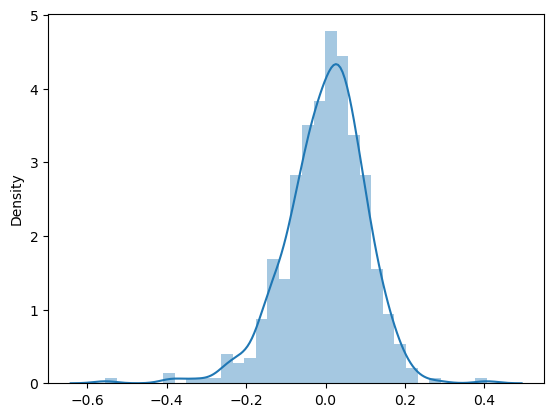

In [93]:
res = y_train - y_train_pred
sns.distplot(res)

# RFE

Recursive feature elimination

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   holiday                                                                                  510 non-null    int64  
 1   workingday                                                                               510 non-null    int64  
 2   temp                                                                                     510 non-null    float64
 3   atemp                                                                                    510 non-null    float64
 4   hum                                                                                      510 non-null    float64
 5   windspeed                                                     

In [95]:
#convert columns to string type as it throws error for column 2019
X_train.columns = X_train.columns.astype(str)

In [96]:
# Running RFE with the output number of the variable equal to 15
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

rfe = RFE(lm2, n_features_to_select = 15) #running RFE
rfe = rfe.fit(X_train, y_train)

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('wednesday', False, 12),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', True, 1),
 ('2019', True, 1),
 ('August', False, 8),
 ('December', False, 4),
 ('February', False, 5),
 ('January', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('November', False, 3),
 ('October', False, 13),
 ('September', True, 1)]

In [102]:
#columns that are included using RFE
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Saturday', 'Sunday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', '2019',
       'July', 'September'],
      dtype='object')

In [103]:
#columns that are dropped using RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'Monday', 'Thursday', 'Tuesday', 'wednesday', 'August',
       'December', 'February', 'January', 'June', 'March', 'May', 'November',
       'October'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [104]:
#creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [105]:
#Adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
#Running Linear model
lm = sm.OLS(y_train, X_train_sm)
#fit
ml_model = lm.fit()
#see the summary of linear model usinf RFE
print(ml_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        21:19:29   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [106]:
X.columns

Index([                                                                             'workingday',
                                                                                     'windspeed',
                                                                                        'spring',
                                                                                        'summer',
                                                                                      'Saturday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                  'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                                                            2019,
                                                                                      'December',
                                                                                       'January',
                    

In [107]:
# Calculate VIF for the new model
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,workingday,50.68
8,Saturday,12.20
9,Sunday,11.79
5,spring,5.02
2,temp,3.62
7,winter,3.49
0,holiday,2.91
6,summer,2.62
3,hum,1.91
11,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.57


In [108]:
# Drop holiday as it is having P-value greater than .05
X = X_train_rfe.drop(["holiday"], axis = 1)

In [109]:
X.columns

Index(['workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       'Saturday', 'Sunday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', '2019',
       'July', 'September'],
      dtype='object')

In [110]:
# Observe new summary after dropping holiday column
X_train_sm = sm.add_constant(X)
#Running Linear model
lm = sm.OLS(y_train, X_train_sm)
#fit
ml_model = lm.fit()
#see the summary of linear model usinf RFE
print(ml_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        21:19:32   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [111]:
# Calculate VIF for the new model
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,hum,32.10
1,temp,18.99
0,workingday,18.41
3,windspeed,4.91
7,Saturday,4.91
4,spring,4.80
8,Sunday,4.76
6,winter,3.69
5,summer,3.04
10,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.31


In [112]:
# Drop column 'hum' as it is having high VIF
X = X.drop(["hum"], axis = 1)

In [113]:
# Observe new summary after dropping 'hum' column
X_train_sm = sm.add_constant(X)
#Running Linear model
lm = sm.OLS(y_train, X_train_sm)
#fit
ml_model = lm.fit()
#see the summary of linear model usinf RFE
print(ml_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.28e-188
Time:                        21:19:35   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [114]:
# Calculate VIF for the new model
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,workingday,16.19
1,temp,12.74
2,windspeed,4.76
6,Saturday,4.45
7,Sunday,4.21
3,spring,3.82
5,winter,2.78
4,summer,2.76
10,2019,2.07
11,July,1.60


In [115]:
# Drop column 'workingday' as it is having high VIF
X = X.drop(["workingday"], axis = 1)

In [116]:
# Observe new summary after dropping 'workingday' column
X_train_sm = sm.add_constant(X)
#Running Linear model
lm = sm.OLS(y_train, X_train_sm)
#fit
ml_model = lm.fit()
#see the summary of linear model usinf RFE
print(ml_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.06e-186
Time:                        21:19:39   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [117]:
# Calculate VIF for the new model
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,temp,5.18
1,windspeed,4.62
3,summer,2.24
2,spring,2.11
9,2019,2.07
4,winter,1.82
10,July,1.59
8,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
11,September,1.33
5,Saturday,1.22


In [118]:
# Drop column 'Saturday' as it is having high P-value
X = X.drop(["Saturday"], axis = 1)

In [119]:
# Observe new summary after dropping 'Saturday' column
X_train_sm = sm.add_constant(X)
#Running Linear model
lm = sm.OLS(y_train, X_train_sm)
#fit
ml_model = lm.fit()
#see the summary of linear model usinf RFE
print(ml_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          3.37e-187
Time:                        21:19:40   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [120]:
# Calculate VIF for the new model
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,temp,5.14
1,windspeed,4.60
3,summer,2.23
2,spring,2.09
8,2019,2.07
4,winter,1.80
9,July,1.59
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
10,September,1.33
5,Sunday,1.17


In [121]:
# Drop column 'temp' as it is having high VIF
X = X.drop(["temp"], axis = 1)

In [122]:
# Observe new summary after dropping 'temp' column
X_train_sm = sm.add_constant(X)
#Running Linear model
lm = sm.OLS(y_train, X_train_sm)
#fit
ml_model = lm.fit()
#see the summary of linear model usinf RFE
print(ml_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          4.80e-149
Time:                        21:19:42   Log-Likelihood:                 406.20
No. Observations:                 510   AIC:                            -790.4
Df Residuals:                     499   BIC:                            -743.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [123]:
# Calculate VIF for the new model
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,windspeed,3.82
1,spring,2.08
2,summer,2.03
7,2019,1.84
3,winter,1.75
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.51
8,July,1.21
4,Sunday,1.16
9,September,1.15
5,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08


In [124]:
# Drop column 'July' as it is having high P-value
X = X.drop(["July"], axis = 1)

In [125]:
# Observe new summary after dropping 'July' column
X_train_sm = sm.add_constant(X)
#Running Linear model
lm = sm.OLS(y_train, X_train_sm)
#fit
ml_model = lm.fit()
#see the summary of linear model usinf RFE
print(ml_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          3.77e-150
Time:                        21:19:47   Log-Likelihood:                 406.12
No. Observations:                 510   AIC:                            -792.2
Df Residuals:                     500   BIC:                            -749.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [126]:
# Calculate VIF for the new model
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,windspeed,3.49
1,spring,1.91
2,summer,1.87
7,2019,1.78
3,winter,1.64
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.51
4,Sunday,1.15
8,September,1.13
5,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08


In [127]:
X.columns

Index(['windspeed', 'spring', 'summer', 'winter', 'Sunday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', '2019',
       'September'],
      dtype='object')

## Residual Analysis

In [128]:
y_train_pred = ml_model.predict(X_train_sm)
y_train_pred

576    0.786976
426    0.400518
728    0.374020
482    0.670337
111    0.389605
         ...   
578    0.800339
53     0.266992
350    0.344763
79     0.363946
520    0.640849
Length: 510, dtype: float64

<Axes: ylabel='Density'>

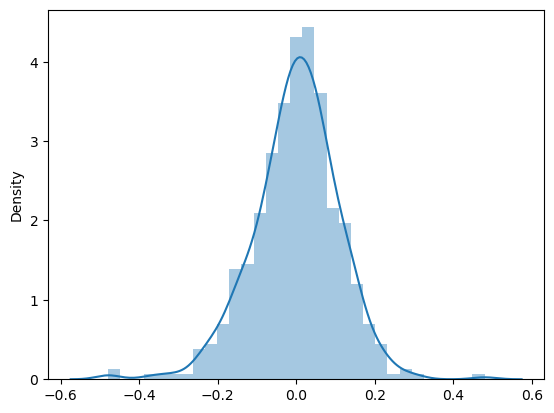

In [129]:
res = y_train - y_train_pred
sns.distplot(res)

# evaluation on Test set

In [130]:
#create list of numeric vars
num_list = ["temp", "atemp", "hum", "windspeed","cnt"]

#fit on data
df_test[num_list] = mnmxscaler.transform(df_test[num_list])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [131]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
#assign dependent variable to y_test and rest of independent variables to X_test
y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index([                                                                                  'const',
                                                                                       'holiday',
                                                                                    'workingday',
                                                                                          'temp',
                                                                                         'atemp',
                                                                                           'hum',
                                                                                     'windspeed',
                                                                                        'spring',
                                                                                        'summer',
                                                                                        'winter',
                    

In [134]:
#drop columns that were dropped in train set
X_test_sm = X_test_sm.drop(["workingday", "Saturday", "March", "October", "June", "wednesday", "atemp", "holiday", "Thursday"
                            , "August", "Tuesday", "Monday", "May", "February", "hum", "temp", "July", "January", "December"
                            , "November"], axis = 1)

In [136]:
#predict
y_test_pred = ml_model.predict(X_test_sm)

In [137]:
#evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7489866044319641

Text(0, 0.5, 'y_test_pred')

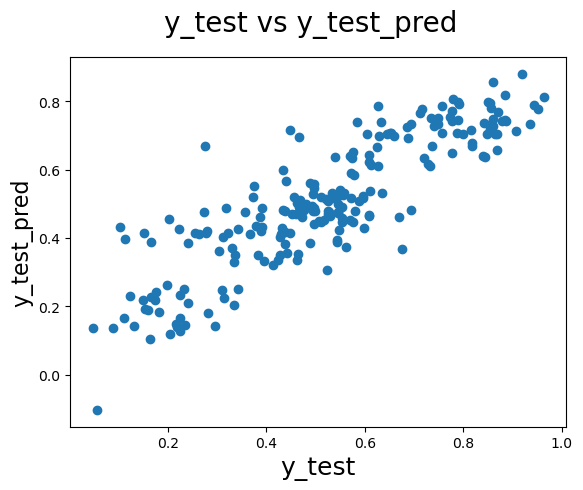

In [138]:
#plot actual vs predicted variable
figure = plt.figure()
plt.scatter(y_test, y_test_pred)
figure.suptitle('y_test vs y_test_pred', fontsize = 20)#plot heading
plt.xlabel('y_test', fontsize = 18)#X-label
plt.ylabel('y_test_pred', fontsize = 16)#Y-label